# Plot 3C waveforms of a subarray in a time window

In [6]:
# Import modules
from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta
from os.path import join

from utils_basic import GEO_STATIONS_A, GEO_STATIONS_B, ROOTDIR_GEO
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_plot import plot_3c_seismograms, save_figure

In [7]:
# Inputs
subarray = "A"
starttime = Timestamp("2020-01-14T04:00:10")
dur = 4.0 # Duration in seconds

freqmin = None
freqmax = None

scale = 1e-3 # Scale factor for plotting
size = 20 # Size of the dots for detections

In [8]:
# Read and preprocess the data
if subarray == "A":
    stations = GEO_STATIONS_A
elif subarray == "B":
    stations = GEO_STATIONS_B
else:
    raise ValueError("Invalid subarray")

stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=stations, freqmin=None, freqmax=None)

Could not find A12.GHZ
Could not find A12.GH1
Could not find A12.GH2
Could not find A18.GH1


Text(0.01, 0.99, 'No filter')

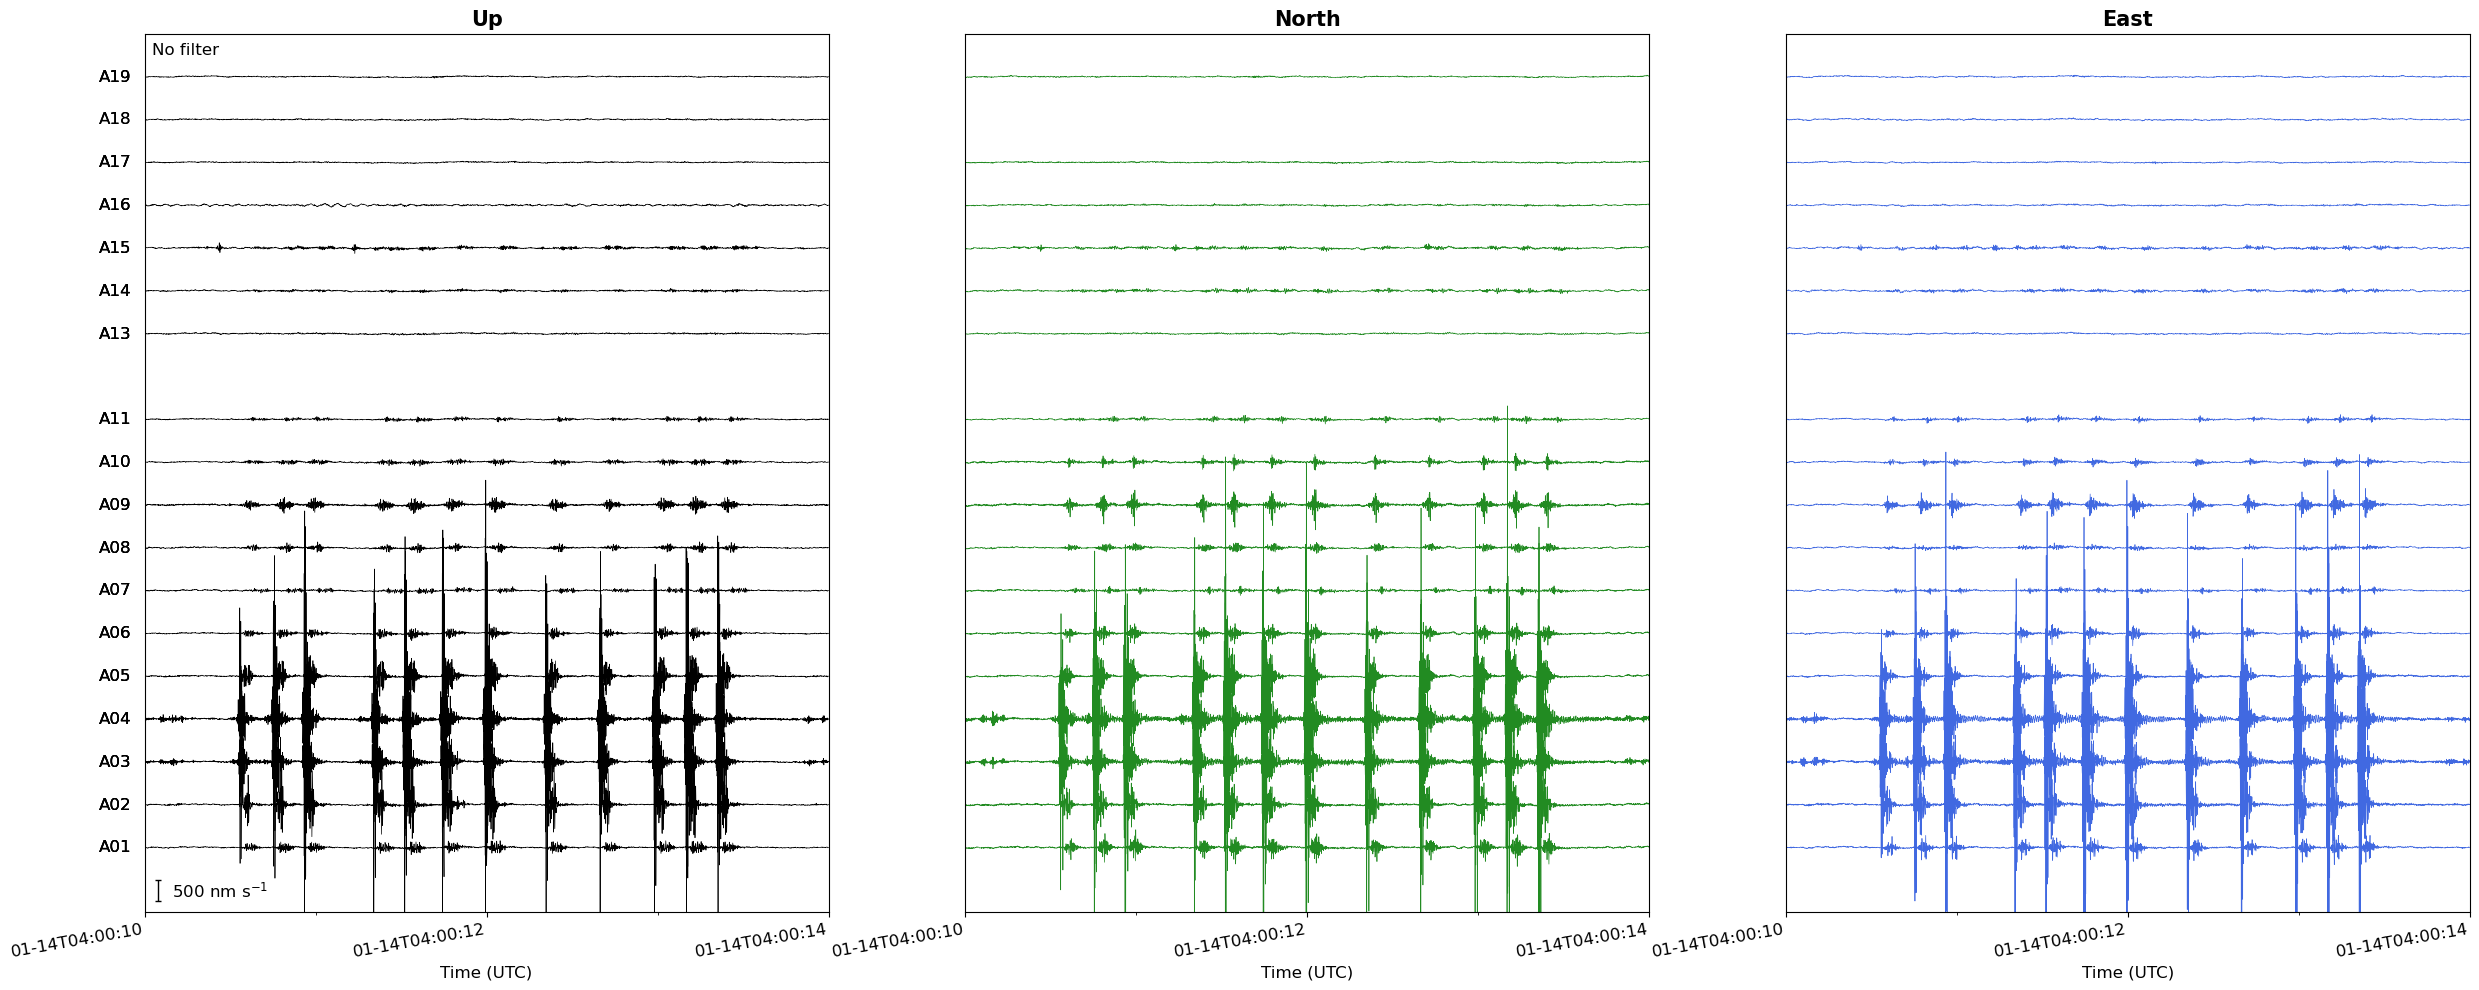

In [9]:
# Plotting
fig, axes = plot_3c_seismograms(stream, stations=stations, scale=scale, major_tick_spacing=2, minor_tick_spacing=1, xdim_per_comp=10, ydim_per_sta=0.6, scale_bar_amp=500)

## Mark the frequency band
if freqmin is not None and freqmax is not None:
    freq_label = f"Bandpass {freqmin:.0f} to {freqmax:.0f} Hz"
elif freqmin is not None:
    freq_label = f"Highpass {freqmin:.0f} Hz"
elif freqmax is not None:
    freq_label = f"Lowpass {freqmax:.0f} Hz"
else:
    freq_label = "No filter"

ax = axes[0]
ax.text(0.01, 0.99, freq_label, transform=ax.transAxes, ha="left", va="top", fontsize=12, color="black")

In [10]:
# Save the figure
timestr = starttime.strftime('%Y-%m-%d-%H-%M-%S')
figname = f"subarray_waveforms_{subarray}_{timestr}_{dur:.0f}s.png"

save_figure(fig, figname, outdir=ROOTDIR_GEO)

Figure saved to /Volumes/OmanData/data/geophones/subarray_waveforms_A_2020-01-14-04-00-10_4s.png
